In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option('display.max_columns',None)
import pickle

In [2]:
data = pd.read_excel('Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.shape

(10683, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
data['journeyday'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.day

In [10]:
data['journeymonth'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.month

In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journeyday,journeymonth
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
data = data.drop(['Date_of_Journey'], axis=1)

In [13]:
data = data.rename(columns={"Airline":"Air"})

In [14]:
data.head()

,Air,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journeyday,journeymonth
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
data['D-hour'] = pd.to_datetime(data.Dep_Time).dt.hour
data['D-minute'] = pd.to_datetime(data.Dep_Time).dt.minute
data = data.drop(['Dep_Time'], axis=1)

In [16]:
data['A-hour'] = pd.to_datetime(data.Arrival_Time).dt.hour
data['A-minute'] = pd.to_datetime(data.Arrival_Time).dt.minute
data = data.drop(['Arrival_Time'], axis=1)

In [17]:
data.head()

,Air,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journeyday,journeymonth,D-hour,D-minute,A-hour,A-minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [18]:
duration = list(data.Duration)
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+ " 0m"
        else:
            duration[i] = "0h " + duration[i]
durationhours=[]
durationmins=[]
for i in range(len(duration)):
    durationhours.append(int(duration[i].split("h")[0]))
    durationmins.append(int(duration[i].split('m')[0].split()[-1]))

In [19]:
data['durationhours'] = durationhours
data['durationmins'] = durationmins

In [20]:
data = data.drop(['Duration'], axis=1)

In [21]:
data.tail()

,Air,Source,Destination,Route,Total_Stops,Additional_Info,Price,journeyday,journeymonth,D-hour,D-minute,A-hour,A-minute,durationhours,durationmins
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,2 stops,No info,11753,9,5,10,55,19,15,8,20


In [22]:
data['Air'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Air, dtype: int64

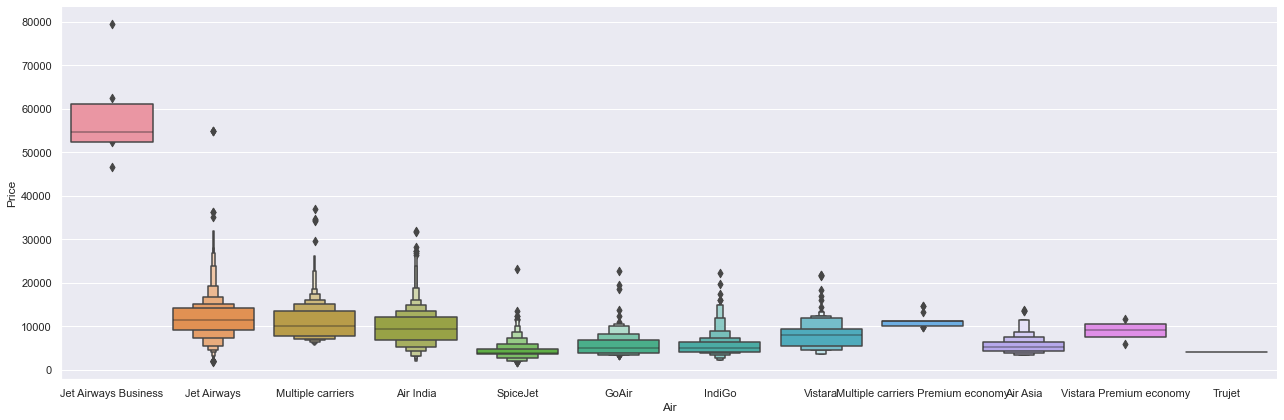

In [23]:
sns.catplot(y="Price", x="Air", data=data.sort_values("Price", ascending=False), kind='boxen', height=6, aspect=3)

In [24]:
airline = data[['Air']]
airline = pd.get_dummies(airline, drop_first=True)
airline.tail()

,Air_Air India,Air_GoAir,Air_IndiGo,Air_Jet Airways,Air_Jet Airways Business,Air_Multiple carriers,Air_Multiple carriers Premium economy,Air_SpiceJet,Air_Trujet,Air_Vistara,Air_Vistara Premium economy
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0
10682,1,0,0,0,0,0,0,0,0,0,0


In [25]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

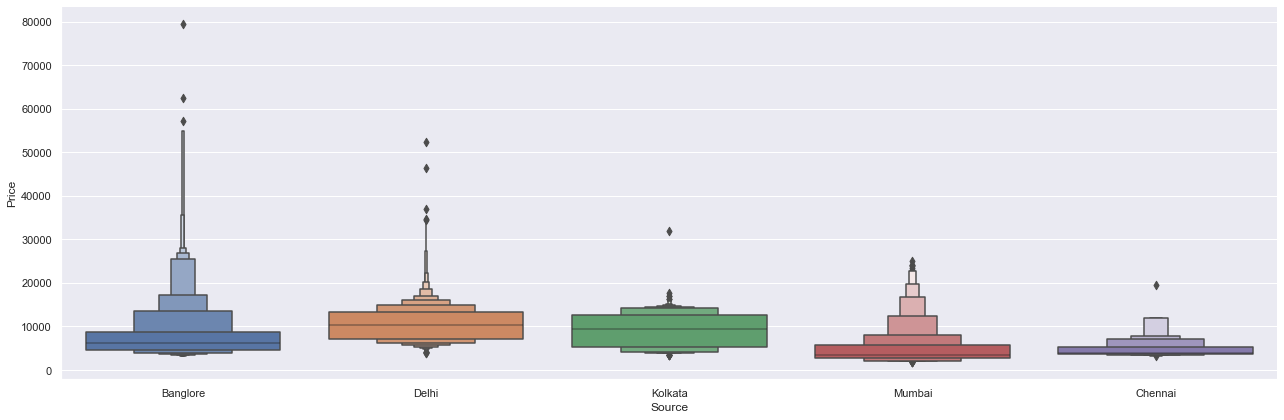

In [26]:
sns.catplot(y='Price', x='Source', data=data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)

In [27]:
source = data[['Source']]
source = pd.get_dummies(source, drop_first=True)
source.tail()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0
10682,0,1,0,0


In [28]:
destination = data[['Destination']]
destination = pd.get_dummies(destination, drop_first=True)
destination.tail()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1
10682,1,0,0,0,0


In [29]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [30]:
a = data.Additional_Info=='No info'

In [31]:
data = data.drop(['Route', 'Additional_Info'], axis=1)

In [32]:
data.tail()

,Air,Source,Destination,Total_Stops,Price,journeyday,journeymonth,D-hour,D-minute,A-hour,A-minute,durationhours,durationmins
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40
10682,Air India,Delhi,Cochin,2 stops,11753,9,5,10,55,19,15,8,20


In [33]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [34]:
data = data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [35]:
datatrain = pd.concat([data, airline,source,destination],axis=1)

In [36]:
datatrain.head()

,Air,Source,Destination,Total_Stops,Price,journeyday,journeymonth,D-hour,D-minute,A-hour,A-minute,durationhours,durationmins,Air_Air India,Air_GoAir,Air_IndiGo,Air_Jet Airways,Air_Jet Airways Business,Air_Multiple carriers,Air_Multiple carriers Premium economy,Air_SpiceJet,Air_Trujet,Air_Vistara,Air_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
datatrain = datatrain.drop(['Destination', 'Source', 'Air'], axis=1)

In [38]:
test_data = pd.read_excel('Test_set.xlsx')

In [39]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [40]:
print("Test data Info")
print(test_data.info())

print()
print()

print("Null values :")
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

Test data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [41]:
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:  
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

print("Airline")
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()


Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64




In [42]:
data_test.shape

(2671, 28)

In [43]:
datatrain.columns

Index(['Total_Stops', 'Price', 'journeyday', 'journeymonth', 'D-hour',
       'D-minute', 'A-hour', 'A-minute', 'durationhours', 'durationmins',
       'Air_Air India', 'Air_GoAir', 'Air_IndiGo', 'Air_Jet Airways',
       'Air_Jet Airways Business', 'Air_Multiple carriers',
       'Air_Multiple carriers Premium economy', 'Air_SpiceJet', 'Air_Trujet',
       'Air_Vistara', 'Air_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [44]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [45]:
x = datatrain.loc[:,['Total_Stops', 'Price', 'journeyday', 'journeymonth', 'D-hour',
       'D-minute', 'A-hour', 'A-minute', 'durationhours', 'durationmins',
       'Air_Air India', 'Air_GoAir', 'Air_IndiGo',
       'Air_Jet Airways', 'Air_Jet Airways Business',
       'Air_Multiple carriers',
       'Air_Multiple carriers Premium economy', 'Air_SpiceJet',
       'Air_Trujet', 'Air_Vistara', 'Air_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [46]:
x.tail()

,Total_Stops,Price,journeyday,journeymonth,D-hour,D-minute,A-hour,A-minute,durationhours,durationmins,Air_Air India,Air_GoAir,Air_IndiGo,Air_Jet Airways,Air_Jet Airways Business,Air_Multiple carriers,Air_Multiple carriers Premium economy,Air_SpiceJet,Air_Trujet,Air_Vistara,Air_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10682,2,11753,9,5,10,55,19,15,8,20,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [47]:
y = datatrain.iloc[: ,1]

In [48]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

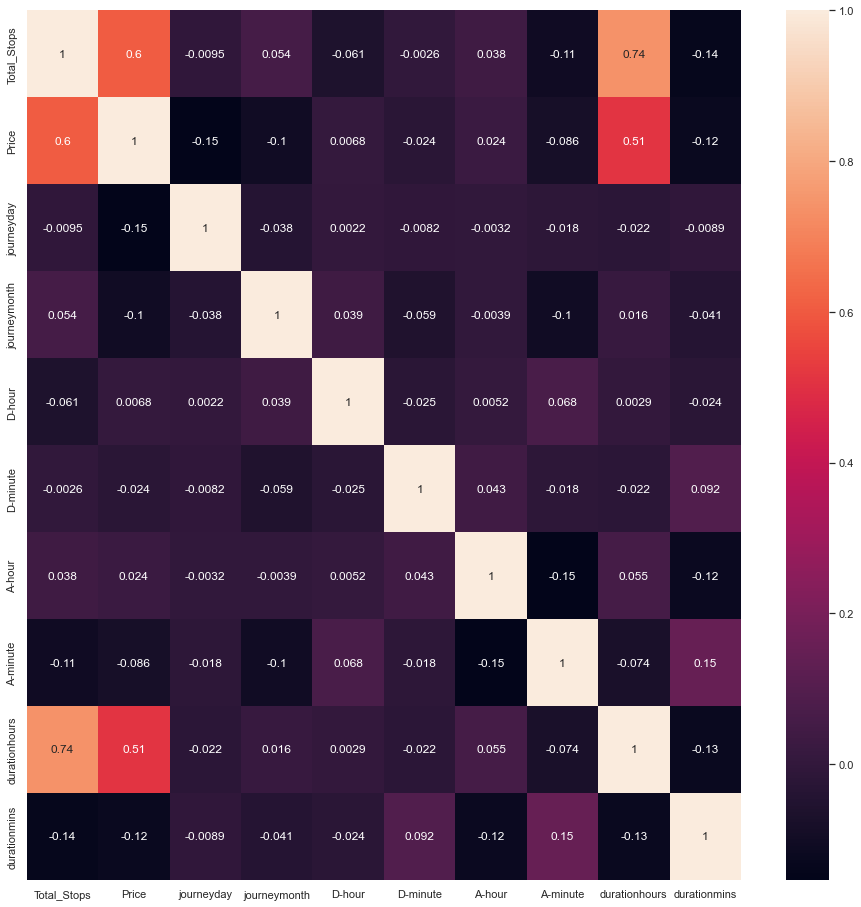

In [49]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [50]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x,y)

ExtraTreesRegressor()

In [51]:
print(etr.feature_importances_)

[1.42377977e-01 6.27731152e-01 2.97921855e-03 1.85435470e-03
 2.56118432e-04 1.41875558e-04 2.21236832e-04 1.04655566e-04
 5.48616020e-02 3.82607974e-04 1.31802371e-03 6.31734932e-05
 4.95418772e-03 1.01590010e-01 2.80254913e-02 4.16303202e-03
 8.80415229e-07 2.08200940e-04 2.12538391e-09 4.62604157e-04
 8.79135533e-08 1.21150230e-05 1.06390952e-02 4.58149546e-04
 1.25763816e-03 2.51217964e-03 6.17627544e-03 1.80796870e-03
 2.63576149e-05 5.41372832e-03]


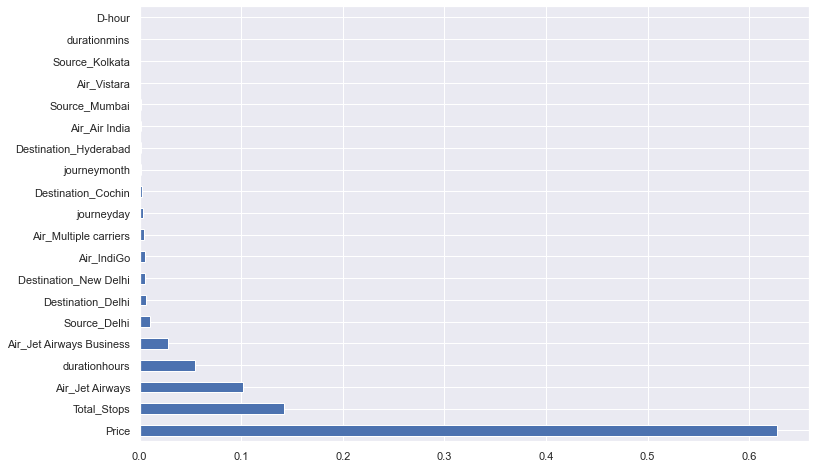

In [52]:
plt.figure(figsize=(12, 8))
feature_imp = pd.Series(etr.feature_importances_, index=x.columns)
feature_imp.nlargest(20).plot(kind='barh')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rfg = RandomForestRegressor()
rfg.fit(x_train,y_train)

RandomForestRegressor()

In [56]:
pred = rfg.predict(x_test)

In [57]:
rfg.score(x_test,y_test)

0.9980156647666366

In [58]:
rfg.score(x_train, y_train)

0.9994465032681945

In [59]:
from sklearn import metrics

In [60]:
metrics.r2_score(y_test,pred)

0.9980156647666366

In [61]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test, pred)

10.924478240524103

In [62]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, pred)

46558.80477646231

In [64]:
pickle.dump(rfg,open('flight_rf.pkl','wb'))
model=pickle.load(open('flight_rf.pkl','rb'))